In [7]:
import os
import numpy as np
import mdtraj as md
import pickle
from simtk.openmm import unit
from tqdm import tqdm_notebook
from simtk.openmm import app
import matplotlib.pyplot as plt
from openeye import oechem

In [4]:
def new_positions(hybrid_positions):
    n_atoms_new = htf._topology_proposal.n_atoms_new
    hybrid_indices = [htf._new_to_hybrid_map[idx] for idx in range(n_atoms_new)]
    return hybrid_positions[hybrid_indices, :]
    
def old_positions(hybrid_positions):
    n_atoms_old = htf._topology_proposal.n_atoms_old
    hybrid_indices = [htf._old_to_hybrid_map[idx] for idx in range(n_atoms_old)]
    return hybrid_positions[hybrid_indices, :]

In [5]:
def make_traj(outdir, htf, i, phase, name, endstate, is_old=True, solvent_only=False):
    with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
        cache = np.load(f)
    if is_old:
        old_pos = np.zeros(shape=(100, htf._topology_proposal.old_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            old_pos[j] = old_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(old_pos, md.Topology.from_openmm(htf._topology_proposal.old_topology))
    else:
        new_pos = np.zeros(shape=(100, htf._topology_proposal.new_topology.getNumAtoms(), 3))
        for j, pos in tqdm_notebook(enumerate(cache)):
            new_pos[j] = new_positions(unit.Quantity(pos, unit=unit.nanometers)).value_in_unit_system(unit.md_unit_system)
        
        traj = md.Trajectory(new_pos, md.Topology.from_openmm(htf._topology_proposal.new_topology))
        
    box_vectors = np.array([val.value_in_unit_system(unit.md_unit_system) for val in htf.hybrid_system.getDefaultPeriodicBoxVectors()])
    vectors = np.array([box_vectors]) 
        
    if solvent_only:
        traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)
        
    # Set unit cell vectors in traj 
#     traj.unitcell_vectors = np.repeat(vectors, 100, axis=0)
#     traj.image_molecules(inplace=True)
    
    if solvent_only:
        traj.save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent.dcd"))
        traj[0].save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent.pdb"))
    else:
        traj.save(os.path.join(outdir, f"{i}_{phase}_{endstate}.dcd"))
        traj[0].save(os.path.join(outdir, f"{i}_{phase}_{endstate}.pdb"))
    return traj
       

### 14/11 N439K

In [10]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/11/"
i = 11
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
# make_traj(outdir, htf, i, phase, name, endstate, is_old)

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/11/"
i = 11
phase = 'complex'
endstate = 1
name = 'lys'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [6]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/11/"
i = 11
phase = 'apo'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [7]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/11/"
i = 11
phase = 'apo'
endstate = 1
name = 'lys'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


Confirm that bonds in solvent are ok when i don't write out protein+glycan atoms (meaning this is strictly a conect record problem)

In [11]:
for bond in htf._topology_proposal.old_topology.bonds():
    if bond[0].index == 103097 or bond[1].index == 103097:
        print(bond)

Bond(<Atom 103098 (H1) of chain 5 residue 30252 (HOH)>, <Atom 103097 (O) of chain 5 residue 30252 (HOH)>)
Bond(<Atom 103099 (H2) of chain 5 residue 30252 (HOH)>, <Atom 103097 (O) of chain 5 residue 30252 (HOH)>)


In [23]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/1/"
i = 1
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

# with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
#     htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old, solvent_only=True)

<ipython-input-22-b1e5f8b41c8a>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

Check whether solvent is still missing patches when I look at the solvent positions of hybrid positions in cache

In [24]:
with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
        cache = np.load(f)

traj = md.Trajectory(cache, htf.hybrid_topology)

traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)

traj.save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid.pdb"))


Load cache solvent positions for 14.1.4

In [ ]:
with open(os.path.join(outdir, f"{i}_{phase}_1.pickle"), 'rb') as f:
    htf = pickle.load(f)

with open(os.path.join(outdir, f"{i}_{phase}_lys_1ns_snapshots.npy"), "rb") as f:
    cache = np.load(f)

print(os.path.join(outdir, f"{i}_{phase}_lys_1ns_snapshots.npy"))
    
traj = md.Trajectory(cache, htf.hybrid_topology)

traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)

traj.save(os.path.join(outdir, f"{i}_{phase}_1_solvent_hybrid_2.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_1_solvent_hybrid_2.pdb"))


Load cache positions for 14.2.4

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/2/"
i = 2
phase = 'complex'

with open(os.path.join(outdir, f"{i}_{phase}_1.pickle"), 'rb') as f:
    htf = pickle.load(f)

with open(os.path.join(outdir, f"{i}_{phase}_tyr_1ns_snapshots.npy"), "rb") as f:
    cache = np.load(f)

print(os.path.join(outdir, f"{i}_{phase}_tyr_1ns_snapshots.npy"))
    
traj = md.Trajectory(cache, htf.hybrid_topology)

traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)

traj.save(os.path.join(outdir, f"{i}_{phase}_1_solvent_hybrid.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_1_solvent_hybrid.pdb"))


/data/chodera/zhangi/perses_benchmark/neq/14/2/2_complex_tyr_1ns_snapshots.npy


Check whether solvent is still missing patches when I look at the solvent positions of htf's hybrid positions

In [25]:
traj = md.Trajectory(htf.hybrid_positions, htf.hybrid_topology)

traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)

traj.save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid_htf.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid_htf.pdb"))


Check whether solvent is still missing matches when I look at the raw nc file hybrid positions

In [29]:
# From Hannah: https://github.com/hannahbrucemacdonald/endstate_pdbs/blob/master/scripts/input_for_pol_calc.py
from perses.analysis.utils import open_netcdf
nc = open_netcdf(os.path.join(outdir, f"{i}_{phase}_{name.lower()}_1ns.nc"))
nc_checkpoint = open_netcdf(os.path.join(outdir, f"{i}_{phase}_{name.lower()}_1ns_checkpoint.nc"))
checkpoint_interval = nc_checkpoint.CheckpointInterval
all_positions = nc_checkpoint.variables['positions']
n_iter, n_replicas, n_atoms, _ = np.shape(all_positions)

In [36]:
all_positions[:10,0].shape

(10, 200487, 3)

In [37]:
traj = md.Trajectory(all_positions[:10, 0], htf.hybrid_topology)

traj.atom_slice(traj.topology.select("water or resname 'na\+' or resn 'cl\-'"), inplace=True)

traj.save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid_nc.dcd"))
traj[0].save(os.path.join(outdir, f"{i}_{phase}_{endstate}_solvent_hybrid_nc.pdb"))


## 14/12 N501Y

In [19]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/12/"
i = 12
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-18-474725023062>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [21]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/12/"
i = 12
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-18-474725023062>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


## 14/4 Q493A

In [4]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/4/"
i = 4
phase = 'complex'
endstate = 0
name = 'gln'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-9e7460d5b835>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [7]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/4/"
i = 4
phase = 'complex'
endstate = 1
name = 'ala'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-9e7460d5b835>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/4/"
i = 4
phase = 'apo'
endstate = 0
name = 'gln'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-9e7460d5b835>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [6]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/4/"
i = 4
phase = 'apo'
endstate = 1
name = 'ala'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-9e7460d5b835>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

## 14/5 T500I

In [12]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/15/"
i = 15
phase = 'complex'
endstate = 0
name = 'thr'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [13]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/15/"
i = 15
phase = 'complex'
endstate = 1
name = 'ile'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [14]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/15/"
i = 15
phase = 'apo'
endstate = 0
name = 'thr'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


In [15]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/15/"
i = 15
phase = 'apo'
endstate = 1
name = 'ile'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-474725023062>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


# 14/16 N501Y complex 

Check if my ASN (lambda = 0) cache contains > 1 dihedral

In [4]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/16/"
i = 16
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
traj = make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-23564febadfb>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

In [6]:
dihedrals = md.compute_dihedrals(traj, np.array([[2605, 2607, 2609, 2612]]))

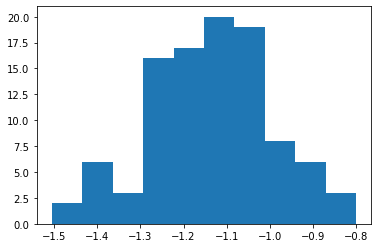

In [7]:
plt.hist(dihedrals)
plt.show()

# 14/24 N487R complex 

In [10]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/15/24/"
i = 24
phase = 'complex'
endstate = 1
name = 'arg'
is_old = False

# with open(os.path.join(outdir, f"{i}_{phase}.pickle"), "rb") as f:
#     htf = pickle.load(f)

In [11]:
with open(os.path.join(outdir, f"{i}_{phase}_{name}_1ns_snapshots.npy"), "rb") as f:
    cache = np.load(f)

In [12]:
cache.shape

(100, 200492, 3)

## 14/36 N501Y

In [7]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/36/"
i = 36
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-6-2634902564b3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183578 atoms, 57059 residues, and unitcells at 0x2b9ea76396a0>

In [8]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/36/"
i = 36
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-6-2634902564b3>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, and unitcells at 0x2b9e08907a30>

In [4]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/36/"
i = 36
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    

In [10]:
query = [2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 183578, 183579, 183580, 183581, 183582, 183583, 183584, 183585, 183586, 183587, 183588, 183589, 183590, 183591, 183592]
rest = [2539, 2542, 2543, 2549, 2558, 2560, 2561, 2562, 2564, 2565, 2570, 2571, 2572, 2573, 2575, 2576, 2589, 2591, 2592, 2593, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 183578, 183579, 183580, 183581, 183582, 183583, 183584, 183585, 183586, 183587, 183588, 183589, 183590, 183591, 183592, 2619, 2620, 2621, 2622, 2653, 2654, 2655, 2669, 2673, 2678, 2679, 2682, 2684, 3600, 3611, 8523, 8524, 8525, 8526, 8528, 8529, 8530, 8531, 8532, 8533, 8534, 8535, 8536, 8537, 8538, 8540, 8553]

In [13]:
count = 0
for atom in htf.hybrid_topology.atoms:
    if atom.index in rest:
        print(atom)
        count += 1
print(count)

GLY496-O
PHE497-CA
PHE497-HA
PHE497-HD1
PHE497-C
GLN498-N
GLN498-H
GLN498-CA
GLN498-CB
GLN498-HB2
GLN498-CD
GLN498-OE1
GLN498-NE2
GLN498-HE21
GLN498-C
GLN498-O
PRO499-C
THR500-N
THR500-H
THR500-CA
THR500-C
THR500-O
ASN501-N
ASN501-H
ASN501-CA
ASN501-HA
ASN501-CB
ASN501-HB2
ASN501-HB3
ASN501-CG
ASN501-OD1
ASN501-ND2
ASN501-HD21
ASN501-HD22
ASN501-C
ASN501-O
ASN501-CB
ASN501-HB2
ASN501-HB3
ASN501-CG
ASN501-CD1
ASN501-HD1
ASN501-CE1
ASN501-HE1
ASN501-CZ
ASN501-OH
ASN501-HH
ASN501-CE2
ASN501-HE2
ASN501-CD2
ASN501-HD2
GLY502-N
GLY502-H
GLY502-CA
GLY502-HA2
TYR505-CB
TYR505-HB2
TYR505-HB3
TYR505-O
GLN506-HA
GLN506-HG2
GLN506-HG3
GLN506-NE2
GLN506-HE22
TYR41-CG
TYR41-HD2
LYS353-CB
LYS353-HB2
LYS353-HB3
LYS353-CG
LYS353-HG3
LYS353-CD
LYS353-HD2
LYS353-HD3
LYS353-CE
LYS353-HE2
LYS353-HE3
LYS353-NZ
LYS353-HZ1
LYS353-HZ2
LYS353-HZ3
LYS353-O
ASP355-HB2
83


In [14]:
len( [2539, 2542, 2543, 2549, 2558, 2560, 2561, 2562, 2564, 2565, 2570, 2571, 2572, 2573, 2575, 2576, 2589, 2591, 2592, 2593, 2603, 2604, 2605, 2606, 2607, 2608, 2609, 2610, 2611, 2612, 2613, 2614, 2615, 2616, 2617, 2618, 44743, 44744, 44745, 44746, 44747, 44748, 44749, 44750, 44751, 44752, 44753, 44754, 44755, 44756, 44757, 2619, 2620, 2621, 2622, 2653, 2654, 2655, 2669, 2673, 2678, 2679, 2682, 2684])

64

In [15]:
len([1198, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 44743, 44744, 44745, 44746, 44747, 44748, 44749, 44750, 1312, 1313, 1314, 1315, 1353, 1354, 1358, 1369, 1383, 1385, 1892, 1900, 1901, 1907])

50

In [16]:
len([1198, 1285, 1286, 1287, 1288, 1289, 1290, 1291, 1292, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 183578, 183579, 183580, 183581, 183582, 183583, 183584, 183585, 1312, 1313, 1314, 1315, 1353, 1354, 1358, 1369, 1383, 1385, 1892, 1900, 1901, 1907, 3424, 3426, 3497])

53

In [17]:
len([2200, 2330, 2331, 2333, 2342, 2343, 2344, 2345, 2346, 2347, 2348, 2349, 2350, 2351, 2352, 2353, 2354, 2355, 2356, 2357, 2358, 183578, 183579, 183580, 183581, 183582, 183583, 183584, 183585, 183586, 183587, 183588, 183589, 183590, 183591, 183592, 183593, 2359, 2360, 2361, 2362, 2363, 2409, 2413, 2431, 2432, 2433, 2435, 2436, 2437, 2438, 2447, 2448, 3447])

54

In [18]:
for res in htf.hybrid_topology.residues:
    if res.resSeq == 501 and res.chain.index == 0:
        mutated_res = res
query_indices = [atom.index for atom in mutated_res.atoms]

In [19]:
query_indices

[2605,
 2606,
 2607,
 2608,
 2609,
 2610,
 2611,
 2612,
 2613,
 2614,
 2615,
 2616,
 2617,
 2618,
 183578,
 183579,
 183580,
 183581,
 183582,
 183583,
 183584,
 183585,
 183586,
 183587,
 183588,
 183589,
 183590,
 183591,
 183592]

In [21]:
traj = md.Trajectory(np.array(htf.hybrid_positions), htf.hybrid_topology)
solute_atoms = list(traj.topology.select("is_protein"))
rest_atoms = list(md.compute_neighbors(traj, 0.3, query_indices, haystack_indices=solute_atoms)[0])

<ipython-input-21-12740af81e68>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rest_atoms = list(md.compute_neighbors(traj, 0.3, query_indices, haystack_indices=solute_atoms)[0])


In [22]:
len(rest_atoms)

83

In [23]:
traj = md.Trajectory(np.array(htf.hybrid_positions), htf.hybrid_topology)
solute_atoms = list(traj.topology.select("is_protein"))
rest_atoms = list(md.compute_neighbors(traj, 0.2, query_indices, haystack_indices=solute_atoms)[0])
len(rest_atoms)

<ipython-input-23-7eba82b6e3b7>:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rest_atoms = list(md.compute_neighbors(traj, 0.2, query_indices, haystack_indices=solute_atoms)[0])


46

## 14/60 N501Y

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/60/"
i = 60
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-2634902564b3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183578 atoms, 57059 residues, and unitcells at 0x2b96926d5ee0>

In [6]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/60/"
i = 60
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-2634902564b3>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, and unitcells at 0x2b965a557ca0>

## 14/64 N501Y

In [4]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/64/"
i = 64
phase = 'complex'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-2634902564b3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183578 atoms, 57059 residues, and unitcells at 0x2b8d4a2fb490>

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/64/"
i = 64
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-2634902564b3>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, and unitcells at 0x2b8d736efeb0>

## 14/83 A501Y

In [5]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/83/"
i = 83
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-4-2634902564b3>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183504 atoms, 57032 residues, and unitcells at 0x2ae9e75a8880>

In [4]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/83/"
i = 83
phase = 'complex'
endstate = 0
name = 'ala'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-3-2634902564b3>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


ValueError: Buffer dtype mismatch, expected 'float' but got 'double'

Exception ignored in: 'mdtraj.geometry._geometry.image_frame'
Traceback (most recent call last):
  File "/home/zhangi/miniconda3/envs/perses-rbd-ace2/lib/python3.8/site-packages/mdtraj/core/trajectory.py", line 2003, in image_molecules
    _geometry.image_molecules(result.xyz, box, anchor_molecules_atom_indices, other_molecules_atom_indices, sorted_bonds)
ValueError: Buffer dtype mismatch, expected 'float' but got 'double'


<mdtraj.Trajectory with 100 frames, 183493 atoms, 57032 residues, and unitcells at 0x2af009c6a610>

## 14/98 N501Y scaled waters

In [15]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/98/"
i = 98
phase = 'apo'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 44750 atoms, 14110 residues, without unitcells at 0x2ab843eab700>

In [16]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/98/"
i = 98
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, without unitcells at 0x2ab8fabc7d60>

## 14/99 N501Y scaled waters

In [14]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/99/"
i = 99
phase = 'apo'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 44750 atoms, 14110 residues, without unitcells at 0x2ab8d5d1fd90>

In [13]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/99/"
i = 99
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, without unitcells at 0x2ab809d84f70>

## 14/100 D501Y scaled waters

In [9]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/100/"
i = 100
phase = 'apo'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 44738 atoms, 14106 residues, without unitcells at 0x2ab828e0f820>

In [8]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/100/"
i = 100
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 183502 atoms, 57032 residues, without unitcells at 0x2ab83187da60>

## 14/101 N501Y scaled waters

In [10]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/101/"
i = 101
phase = 'apo'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 44750 atoms, 14110 residues, without unitcells at 0x2ab7d999c190>

In [12]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/101/"
i = 101
phase = 'complex'
endstate = 1
name = 'tyr'
is_old = False

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 183585 atoms, 57059 residues, without unitcells at 0x2ab7fd6dd160>

In [11]:
outdir = "/data/chodera/zhangi/perses_benchmark/neq/14/101/"
i = 101
phase = 'apo'
endstate = 0
name = 'asn'
is_old = True

with open(os.path.join(outdir, f"{i}_{phase}_{endstate}.pickle"), "rb") as f:
    htf = pickle.load(f)
    
make_traj(outdir, htf, i, phase, name, endstate, is_old)

<ipython-input-5-c1408d746d36>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j, pos in tqdm_notebook(enumerate(cache)):


0it [00:00, ?it/s]

<mdtraj.Trajectory with 100 frames, 44743 atoms, 14110 residues, without unitcells at 0x2ab7e1284fd0>